## Verify basic wrapper and plotting functionality 

In [1]:
%matplotlib notebook

import warnings
warnings.simplefilter("always", RuntimeWarning)

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as ptch

import gravbin as gb

In [3]:
T = 2*np.pi
orbits = 2
samples_per_orbit = 500
two_periods = np.linspace(0, orbits*T, orbits*samples_per_orbit)

#### binary + 0 particles

In [ ]:
test_sim = gb.BinarySim(mass_ratio=1.0)
test_sim.run(two_periods)
gb.plot_orbits_inertial(test_sim)

test_sim = gb.BinarySim(mass_ratio=0.5)
test_sim.run(two_periods)
gb.plot_orbits_inertial(test_sim)

test_sim = gb.BinarySim(mass_ratio=0.6, eccentricity=0.9)
test_sim.run(two_periods)
gb.plot_orbits_inertial(test_sim)

#### Binary + n particles

In [ ]:
test_sim = gb.BinarySim(mass_ratio=0.8)
test_sim.add_test_particles([[0, 0, 0]], [[0, 0, 0]])
test_sim.run(two_periods)
gb.plot_orbits_inertial(test_sim)

test_sim = gb.BinarySim(mass_ratio=0.8)
pos = np.zeros((9, 3))
starting_x = [0, -0.3, -0.6, -0.9, -1.2, 0.15, 0.45, 0.75, 1.05]
pos[:, 0] = starting_x
vel = np.zeros(pos.shape)
test_sim.add_test_particles(pos, vel)
test_sim.run(two_periods)
fig, ax = plt.subplots()
gb.plot_orbits_inertial(test_sim, ax, alpha=0.6)
ax.plot(*pos[:, :2].T, marker='o',
        linestyle='', color='k') # orbit starting points

test_sim = gb.BinarySim(mass_ratio=0.8, eccentricity=0.8)
pos = np.zeros((9, 3))
starting_x = [0, -0.3, -0.6, -0.9, -1.2, 0.15, 0.45, 0.75, 1.05]
pos[:, 0] = starting_x
vel = np.zeros(pos.shape)
test_sim.add_test_particles(pos, vel)
test_sim.run(two_periods)
fig, ax = plt.subplots()
gb.plot_orbits_inertial(test_sim, ax, alpha=0.6)
ax.plot(*pos[:, :2].T, marker='o',
        linestyle='', color='k') # orbit starting points

#### Collisions 

t=0.0641063686916: removing 6 - collision with binary 0
t=0.0686674110052: removing 9 - collision with binary 0
t=0.0801769806076: removing 13 - collision with binary 1
t=0.0933080939524: removing 17 - collision with binary 1
t=0.103110829102: removing 14 - collision with binary 1
t=0.104212917343: removing 8 - collision with binary 0
t=0.106337841422: removing 5 - collision with binary 0
t=0.107366610926: removing 12 - collision with binary 1
t=0.11679715802: removing 11 - collision with binary 1
t=0.118884346111: removing 4 - collision with binary 0
t=0.12577480046: removing 3 - collision with binary 0
t=0.13034523588: removing 2 - collision with binary 0
t=0.14067745985: removing 7 - collision with binary 0
t=0.179895738956: removing 15 - collision with binary 1
t=0.180746325992: removing 10 - collision with binary 1
t=0.2049113658: removing 16 - collision with binary 1


<IPython.core.display.Javascript object>


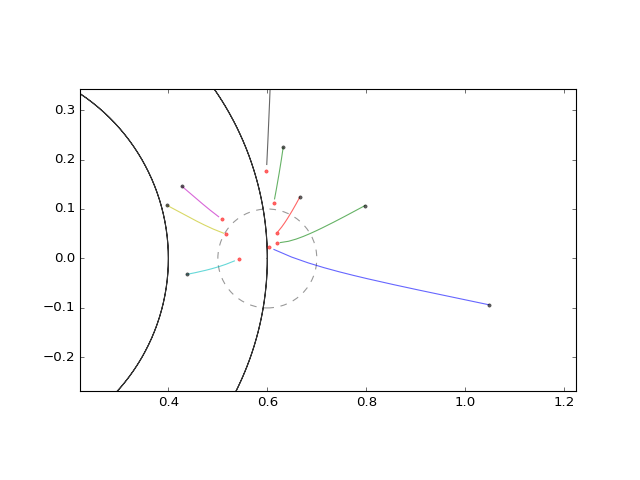

In [12]:
bin_radius = 0.1
test_start_distance = 0.15
test_start_speed = 0.6
num_tests = 16
mass_ratio = 0.6
test_per_binary = int(num_tests)/2
test_sim = gb.BinarySim(mass_ratio=mass_ratio, radius_1=bin_radius, 
                        radius_2=bin_radius)
bin1_start = np.array([mass_ratio - 1, 0, 0])
bin2_start = np.array([mass_ratio, 0, 0])
random_dirs_1 = np.random.random((test_per_binary, 3)) - 0.5
random_dirs_1 = (random_dirs_1.T/np.sum(random_dirs_1**2, axis=1)).T
random_dirs_2 = np.random.random((test_per_binary, 3)) - 0.5
random_dirs_2 = (random_dirs_2.T/np.sum(random_dirs_2**2, axis=1)).T
pos = np.zeros((2*test_per_binary, 3))
vel = np.zeros((2*test_per_binary, 3))
pos[:test_per_binary, :] = bin1_start + test_start_distance*random_dirs_1
vel[:test_per_binary, :] = -test_start_speed*random_dirs_1
pos[test_per_binary:, :] = bin2_start + test_start_distance*random_dirs_2
vel[test_per_binary:, :] = -test_start_speed*random_dirs_2
test_sim.add_test_particles(pos, vel)
test_sim.run(two_periods)
fig, ax = plt.subplots()
gb.plot_orbits_inertial(test_sim, ax, alpha=0.6)
ax.add_patch(ptch.Circle(bin1_start[:2], bin_radius, alpha=0.4,
                     facecolor='none', linestyle='--'))
ax.add_patch(ptch.Circle(bin2_start[:2], bin_radius, alpha=0.4,
                     facecolor='none', linestyle='--'))
ax.plot(*pos[:, :2].T, marker='.',
        linestyle='', color='k', alpha=0.6) # orbit starting points
collision_points = np.asarray(test_sim.collisions["pos"])
ax.plot(*collision_points[:, :2].T, color='r',
        marker='.', linestyle='', alpha=0.6)

#### Escapes 

t=3.24536898749: removing 6 - escape
t=4.36489549868: removing 15 - escape
t=5.04415877513: removing 16 - escape
t=7.3586854949: removing 2 - escape
t=7.77981115389: removing 7 - escape
t=8.87417976595: removing 8 - escape
t=9.00652788777: removing 5 - escape
t=9.77986413455: removing 12 - escape
t=10.3836537136: removing 10 - escape
t=10.4088116128: removing 13 - escape
t=10.4656860372: removing 9 - escape
t=12.0883705309: removing 3 - escape
t=12.1009494805: removing 11 - escape
t=12.1638442283: removing 17 - escape


<IPython.core.display.Javascript object>


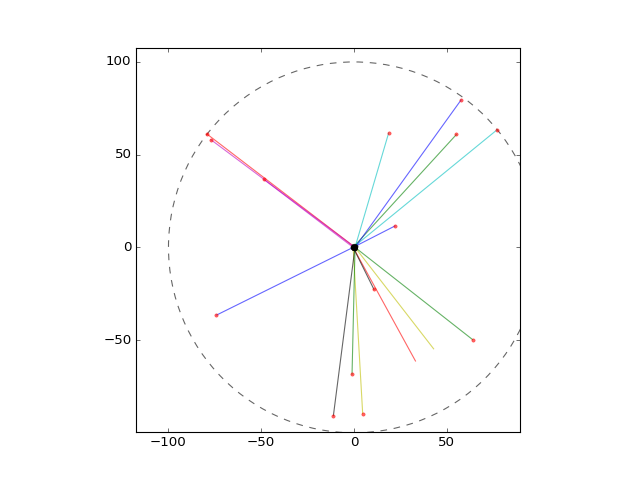

In [13]:
test_start_distance = 0.15
test_start_speed = 5.0
num_tests = 16
mass_ratio = 0.6
sim_boundary = 100
test_per_binary = int(num_tests)/2
test_sim = gb.BinarySim(mass_ratio=mass_ratio, radius_1=bin_radius, 
                        radius_2=bin_radius)
bin1_start = np.array([mass_ratio - 1, 0, 0])
bin2_start = np.array([mass_ratio, 0, 0])
random_dirs_1 = np.random.random((test_per_binary, 3)) - 0.5
random_dirs_1 = (random_dirs_1.T/np.sum(random_dirs_1**2, axis=1)).T
random_dirs_2 = np.random.random((test_per_binary, 3)) - 0.5
random_dirs_2 = (random_dirs_2.T/np.sum(random_dirs_2**2, axis=1)).T
pos = np.zeros((2*test_per_binary, 3))
vel = np.zeros((2*test_per_binary, 3))
pos[:test_per_binary, :] = bin1_start + test_start_distance*random_dirs_1
vel[:test_per_binary, :] = test_start_speed*random_dirs_1
pos[test_per_binary:, :] = bin2_start + test_start_distance*random_dirs_2
vel[test_per_binary:, :] = test_start_speed*random_dirs_2
test_sim.add_test_particles(pos, vel)
test_sim.run(two_periods)
fig, ax = plt.subplots()
gb.plot_orbits_inertial(test_sim, ax, alpha=0.6)
ax.add_patch(ptch.Circle((0,0), sim_boundary, alpha=0.6,
                     facecolor='none', linestyle='--'))
ax.plot(*pos[:, :2].T, marker='.',
        linestyle='', color='k', alpha=0.6) # orbit starting points
escape_points = np.asarray(test_sim.escapes["pos"])
ax.plot(*escape_points[:, :2].T, color='r',
        marker='.', linestyle='', alpha=0.6)